In [3]:
import sys, os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

from RFSoC_Daq import RFSoC_Daq
from Biquad import Biquad
from SimBiquad import SimBiquad
from Biquad_Daq import Biquad_Daq
from SpectrumAnalyser import SpectrumAnalyser
from Filter import Filter
from Transfer import Transfer

from Waveforms.Waveform import Waveform

In [4]:
daq = Biquad_Daq()
sim = SimBiquad()
sam = SpectrumAnalyser()
filter = Filter()
transfer = Transfer()

DEBUG:RFSoC_Daq:Asked to load overlay at /home/xilinx/python/zcumts.py
DEBUG:RFSoC_Daq:Adding directory /home/xilinx/python to module search path
DEBUG:RFSoC_Daq:Changing directory to /home/xilinx/python
DEBUG:RFSoC_Daq:Going to try to import zcumts
DEBUG:RFSoC_Daq:Found Overlay class Overlay from module pynq.overlay
DEBUG:RFSoC_Daq:Found RFSoC overlay zcuMTS


Turning on SYNC
Turning off SYNC


DEBUG:RFSoC_Daq:Created RFSoC device
DEBUG:RFSoC_Daq:Restoring original module search path
DEBUG:RFSoC_Daq:Going back to original directory /home/xilinx/rfsoc-pydaq/Biquad/Notebooks


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

In [6]:
filter.calc_params(460, 30)

transfer.set_params(**filter.get_params())

daq.update_params(**filter.get_params())
daq.quantise_coeffs()
daq.run_Biquad()

sim.update_params(**filter.get_params())
sim.quantise_coeffs()
sim.data = daq.adcBuffer[0] >> 4

Time taken: 3.8349215984344482 seconds


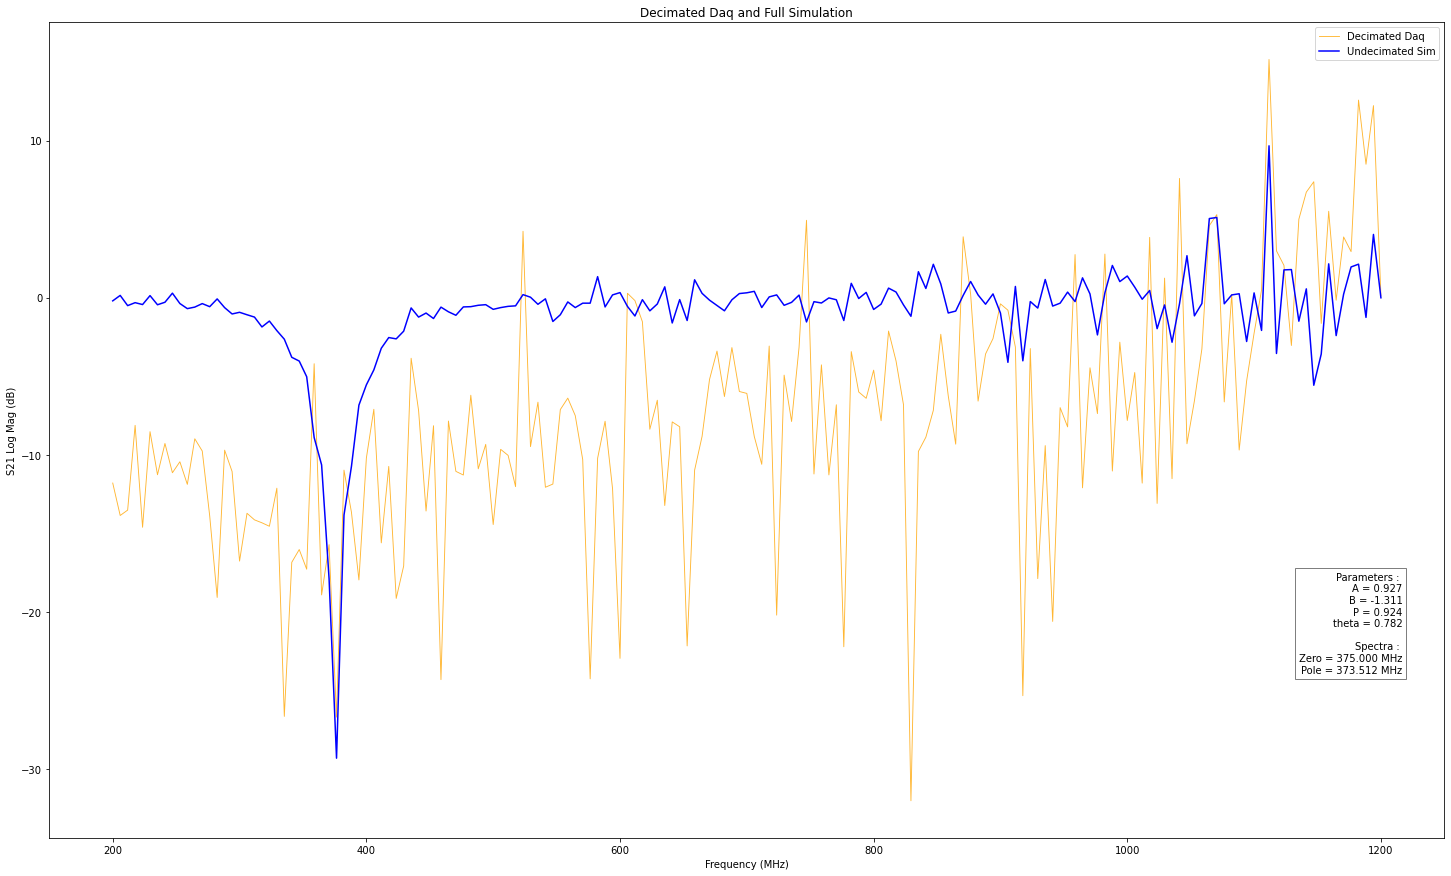

In [10]:
fig, axS21 = plt.subplots(1, 1, figsize=(25, 15))

import time
start_time = time.time()

xf, S21_log_mag_1, S21_log_mag_sim = sam.S21_loop_sim(daq, sim, 20)

end_time = time.time()
print(f"Time taken: {end_time - start_time} seconds")

x_min = 200*10**6
x_max = 1200*10**6
indices = (xf >= x_min) & (xf <= x_max)

axS21.plot(xf[indices]/10**6, S21_log_mag_1[indices], label='Decimated Daq', color='orange', alpha=0.8, linewidth=0.9)
axS21.plot(xf[indices]/10**6, S21_log_mag_sim[indices], label='Undecimated Sim', color='blue')
axS21.set_xlabel("Frequency (MHz)")
axS21.set_ylabel("S21 Log Mag (dB)")
axS21.set_title("Decimated Daq and Full Simulation")

axS21.text(0.97, 0.20, filter.__str__(), verticalalignment='bottom', horizontalalignment='right',
            transform=axS21.transAxes, bbox=dict(facecolor='white', alpha=0.5))

plt.legend()
plt.show()

/home/xilinx/rfsoc-pydaq/Biquad/SpectrumAnalyser.py:59: RuntimeWarning: divide by zero encountered in true_divide
  return self._S2.fft/self._S1.fft
/home/xilinx/rfsoc-pydaq/Biquad/SpectrumAnalyser.py:59: RuntimeWarning: invalid value encountered in true_divide
  return self._S2.fft/self._S1.fft
/home/xilinx/rfsoc-pydaq/Biquad/SpectrumAnalyser.py:92: RuntimeWarning: invalid value encountered in cdouble_scalars
  S21_mean = [sum(x) / len(S21_arr) for x in zip(*S21_arr)]


Time taken: 151.15415167808533 seconds


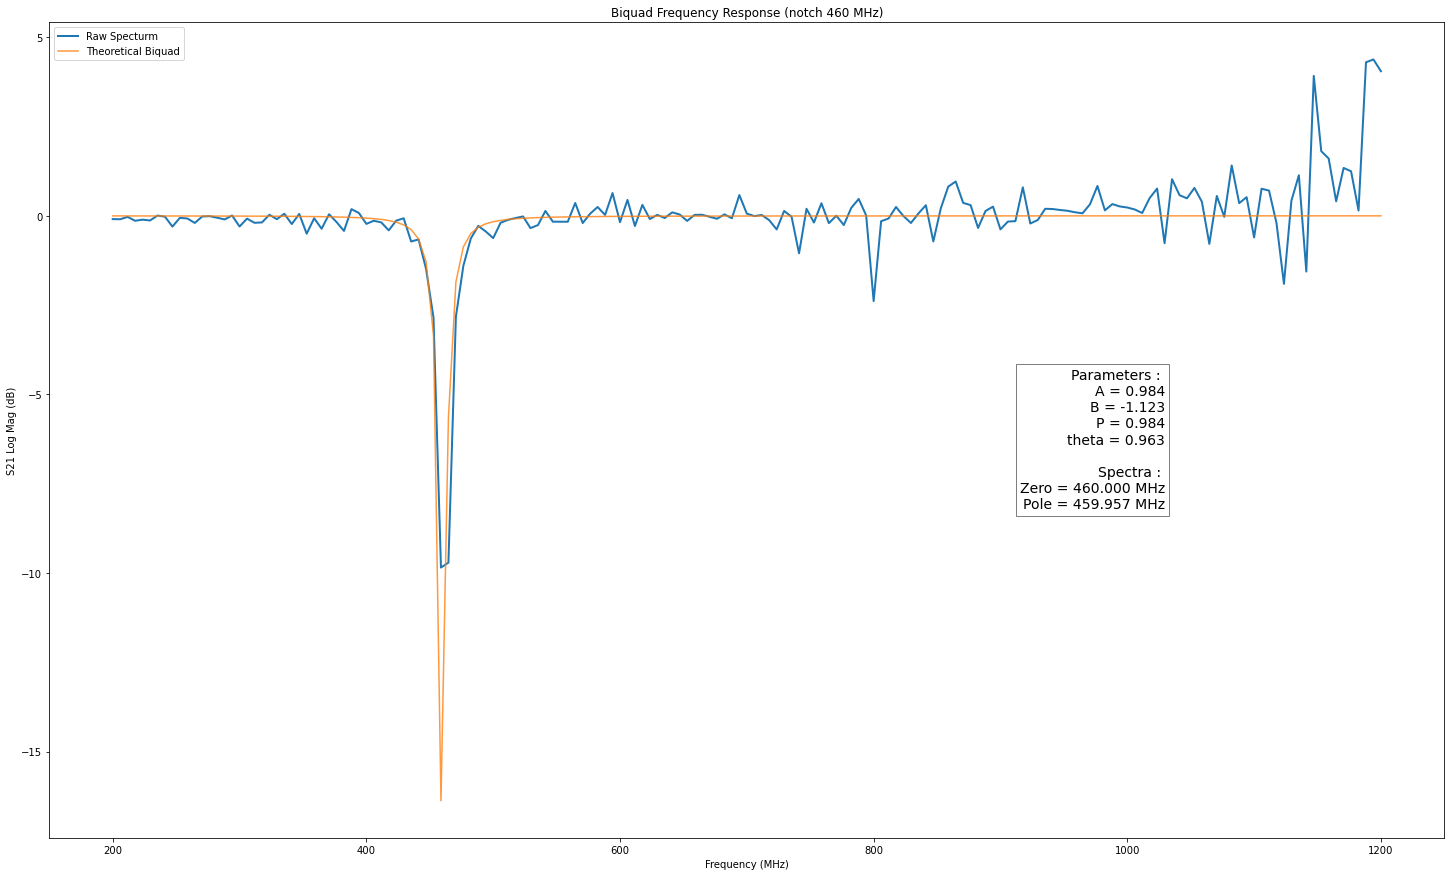

In [7]:
fig, axS21 = plt.subplots(1, 1, figsize=(25, 15))

import time
start_time = time.time()

xf, S21_log_mag = sam.S21_loop(daq,100000)

end_time = time.time()
print(f"Time taken: {end_time - start_time} seconds")

x_min = 200*10**6
x_max = 1200*10**6
indices = (xf >= x_min) & (xf <= x_max)

axS21.plot(xf[indices]/10**6, S21_log_mag[indices]-(20*np.log10(1/4)), label='Raw Specturm', linewidth=2)
axS21.set_xlabel("Frequency (MHz)")
axS21.set_ylabel("S21 Log Mag (dB)")
axS21.set_ylabel("S21 Log Mag (dB)")
axS21.set_title(f"Biquad Frequency Response (notch {filter.fz} MHz)")

axS21.text(0.80, 0.40, filter.__str__(), verticalalignment='bottom', horizontalalignment='right',
           transform=axS21.transAxes, bbox=dict(facecolor='white', alpha=0.5), fontsize=14)



result = []
axis = []

for freq in xf[indices]:
    axis.append(freq)
    result.append(abs(transfer.transfer_function_frequency(freq)))

axS21.plot(xf[indices]/10**6, 20*np.log10(result), label = 'Theoretical Biquad', alpha=0.8)


plt.legend()
plt.show()

# file_path = '/home/xilinx/rfsoc-pydaq/Biquad/images/'
# file_name = 'Frequency_Response'
# fig.savefig(f'{file_path}{file_name}.png', bbox_inches='tight')

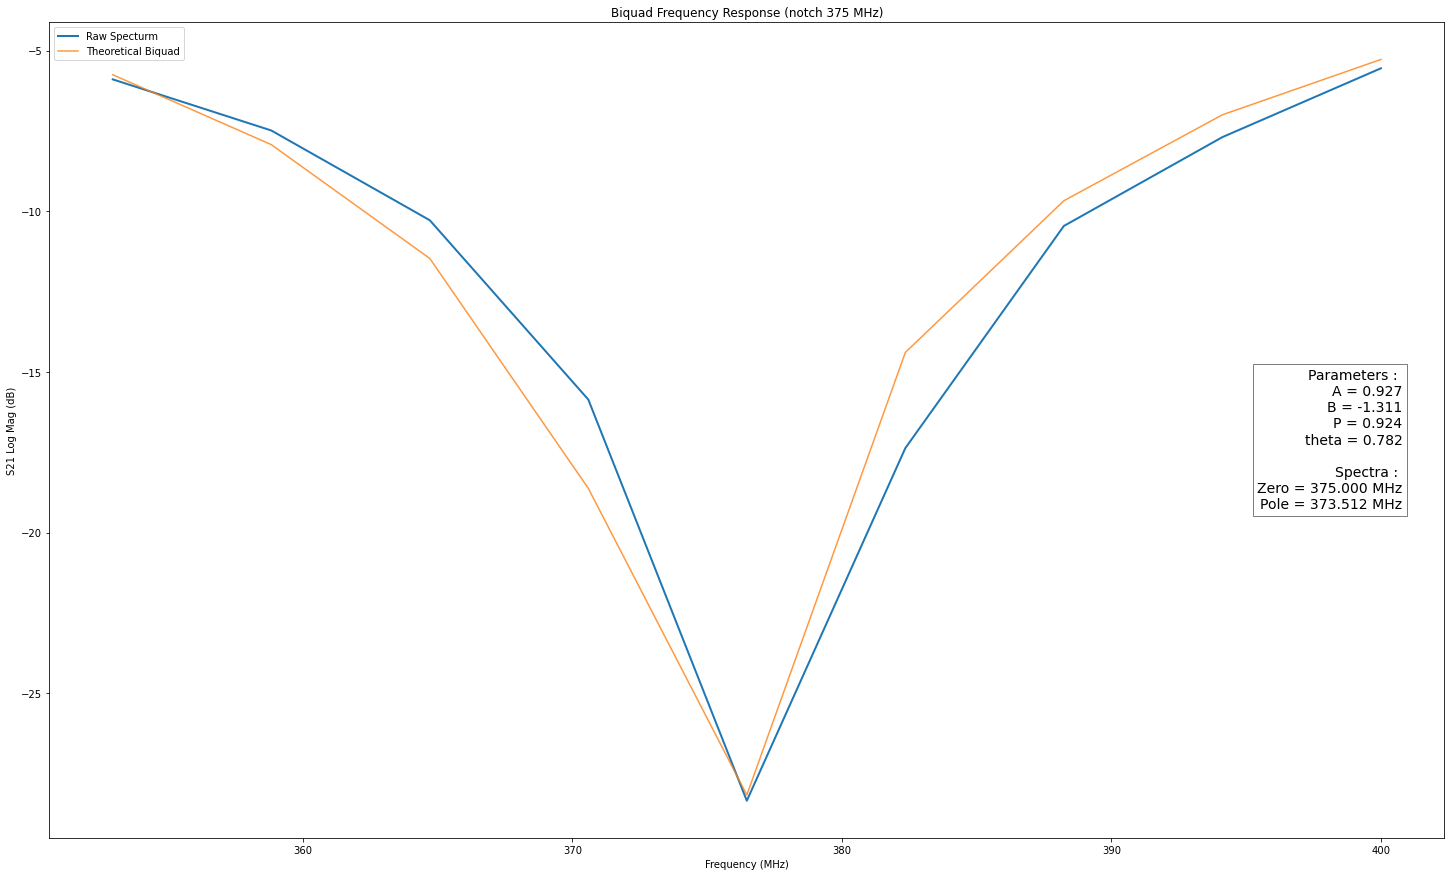

In [14]:
fig, axS21 = plt.subplots(1, 1, figsize=(25, 15))

x_min = 350*10**6
x_max = 400*10**6
indices = (xf >= x_min) & (xf <= x_max)


axS21.plot(xf[indices]/10**6, S21_log_mag[indices]-(20*np.log10(1/4)), label='Raw Specturm', linewidth=2)

result = []
axis = []

for freq in xf[indices]:
    axis.append(freq)
    result.append(abs(transfer.transfer_function_frequency(freq)))

axS21.plot(xf[indices]/10**6, 20*np.log10(result), label = 'Theoretical Biquad', alpha=0.8)

axS21.set_xlabel("Frequency (MHz)")
axS21.set_ylabel("S21 Log Mag (dB)")
axS21.set_ylabel("S21 Log Mag (dB)")
axS21.set_title(f"Biquad Frequency Response (notch {filter.fz} MHz)")

axS21.text(0.97, 0.40, filter.__str__(), verticalalignment='bottom', horizontalalignment='right',
           transform=axS21.transAxes, bbox=dict(facecolor='white', alpha=0.5), fontsize=14)

plt.legend()
plt.show()

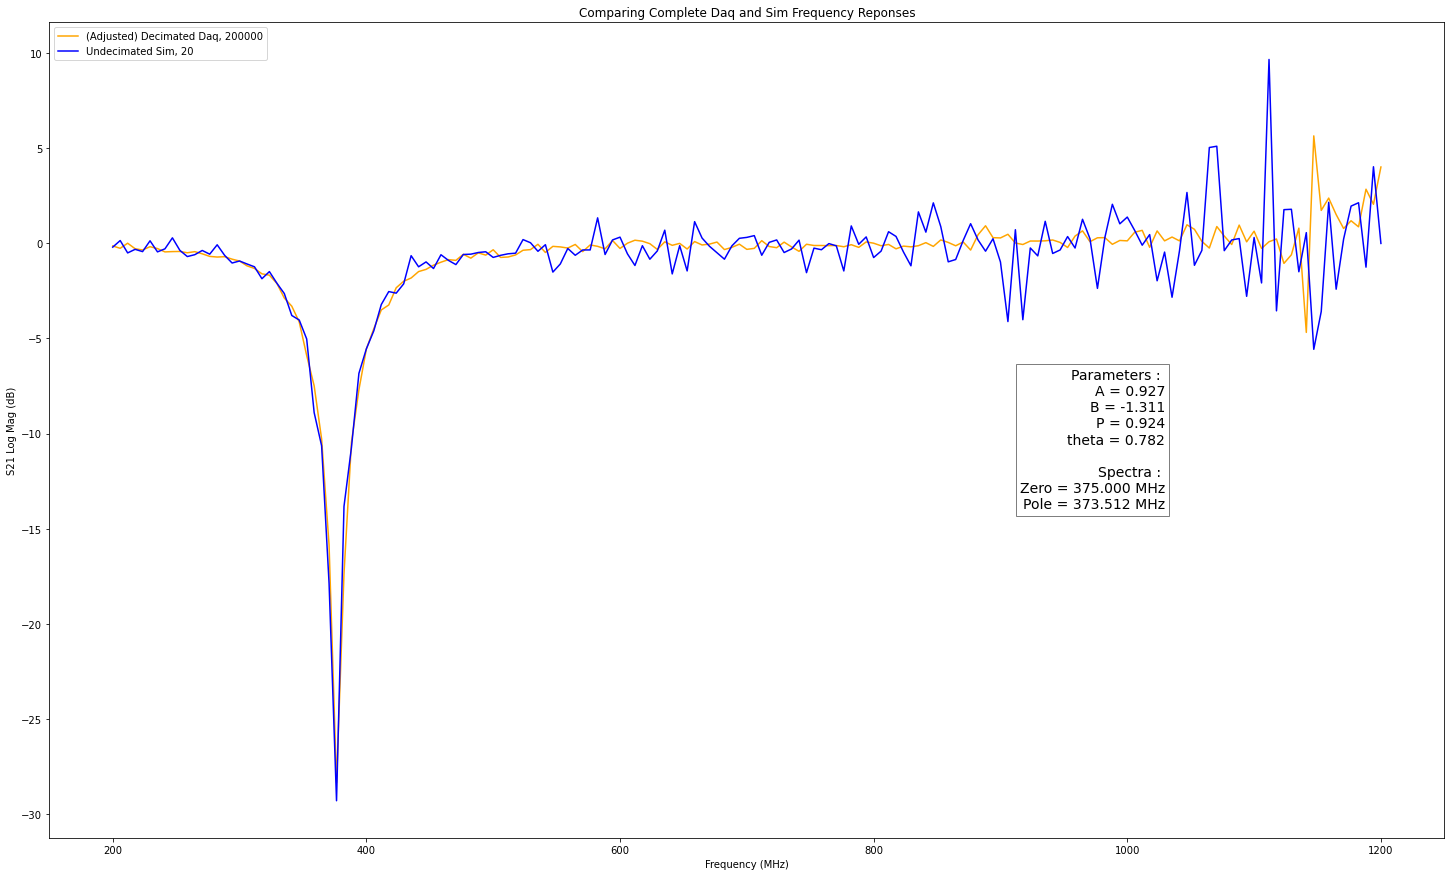

376.4705882352941
382.35294117647055


In [13]:
fig, axS21 = plt.subplots(1, 1, figsize=(25, 15))

x_min = 200*10**6
x_max = 1200*10**6
indices = (xf >= x_min) & (xf <= x_max)

axS21.plot(xf[indices]/10**6, S21_log_mag[indices]-(20*np.log10(1/4)), label='(Adjusted) Decimated Daq, 200000', color='orange')
axS21.plot(xf[indices]/10**6, S21_log_mag_sim[indices], label='Undecimated Sim, 20', color='blue')
axS21.set_xlabel("Frequency (MHz)")
axS21.set_ylabel("S21 Log Mag (dB)")
axS21.set_title(f"Comparing Complete Daq and Sim Frequency Reponses")

axS21.text(0.80, 0.40, filter.__str__(), verticalalignment='bottom', horizontalalignment='right',
           transform=axS21.transAxes, bbox=dict(facecolor='white', alpha=0.5), fontsize=14)

plt.legend()
plt.show()

index = np.argmin(S21_log_mag[indices])
print(xf[indices][index]/10**6)
print(xf[indices][index+1]/10**6)

# file_path = '/home/xilinx/rfsoc-pydaq/Biquad/images/'
# file_name = 'Frequency_Response'
# fig.savefig(f'{file_path}{file_name}.png', bbox_inches='tight')